In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("united-states.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4,6,42,81,90,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,RecordNo,endtime,state,qweek,i1_health,i2_health,i7a_health,i3_health,i4_health,i5_health_1,...,WAH5,WAH7_1,WAH7_2,WAH7_3,WAH7_4,WAH7_5,WAH7_6,WAH7_7,WAH7_99,WAH6
0,0,02/04/2020 08:11,California,week 1,5,7,0,"No, I have not",,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,02/04/2020 08:12,Pennsylvania,week 1,3,4,0,"No, I have not","No, they have not",No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,02/04/2020 08:15,Florida,week 1,1,12,0,"No, I have not","No, they have not",Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,02/04/2020 08:15,California,week 1,5,8,1,"No, I have not","No, they have not",No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,02/04/2020 08:15,Florida,week 1,1,1,0,"No, I have not","No, they have not",Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33935,33935,13/10/2021 16:30,Texas,week 33,,2,,,,,...,Not at all likely,,,,,,,,,
33936,33936,13/10/2021 16:37,Kansas,week 33,,20,,,,,...,,,,,,,,,,Not at all likely
33937,33937,13/10/2021 16:37,Texas,week 33,,5,,,,,...,,,,,,,,,,Not at all likely
33938,33938,13/10/2021 16:41,Massachusetts,week 33,,4,,,,,...,Not at all likely,,,,,,,,,


In [4]:
other_bucket = df[['i3_health', 'i5a_health', 'i8_health','i12_health_1', 
                    'i12_health_2', 'i12_health_8', 'i12_health_9', 'i12_health_11', 
                    'i12_health_16', 'weight','age','gender','household_size','employment_status']].copy()


In [5]:
other_bucket.rename(columns={'i3_health': 'COVID-19 Status', 'i5a_health': 'Contact w/ COVID', 
                         'i8_health': 'Travel', 'i12_health_1': 'Facemask Use', 'i12_health_2': 'Soap Use',  
                         'i12_health_16':'Avoided shops'}, inplace=True)


In [6]:
other_bucket.rename(columns={'i12_health_8': 'Avoided public transport?', 'i12_health_9': 'Avoided working from home?' 
                         }, inplace=True)


In [7]:
other_bucket = pd.get_dummies(other_bucket, columns=['COVID-19 Status','Contact w/ COVID','Travel','Facemask Use',
                                                    'Soap Use','Avoided shops','Avoided public transport?','Avoided working from home?',
                                                     'gender'])


In [8]:
other_bucket = pd.get_dummies(other_bucket, columns=['employment_status'])

In [9]:
household_size = []
for i in other_bucket.household_size:
    if len(i) > 1:
        i = 'nan'
    household_size.append(i)

In [10]:
other_bucket['household_size2'] = household_size

In [11]:
mask = other_bucket['household_size2'] != "nan"

In [12]:
other_bucket2 = other_bucket[mask]

In [13]:
other_bucket2.drop(['household_size'],axis=1)

,i12_health_11,weight,age,COVID-19 Status_,"COVID-19 Status_No, I have not","COVID-19 Status_Yes, and I have not received my results from the test yet","COVID-19 Status_Yes, and I tested negative","COVID-19 Status_Yes, and I tested positive",Contact w/ COVID_,Contact w/ COVID_No,...,gender_Female,gender_Male,employment_status_Full time employment,employment_status_Full time student,employment_status_Not working,employment_status_Other,employment_status_Part time employment,employment_status_Retired,employment_status_Unemployed,household_size2
0,Rarely,0.907068,33,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,5
1,Frequently,0.878366,38,0,1,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,4
2,Always,1.150452,48,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,2
3,Always,0.995127,31,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,5
4,Always,1.354855,69,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33935,Rarely,4.645645,59,1,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,3
33936,Rarely,1.287069,37,1,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,3
33937,Frequently,0.753059,71,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,2
33938,Frequently,1.139877,35,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,2


In [14]:
my_list = other_bucket2.columns.values.tolist()

print (my_list)

['i12_health_11', 'weight', 'age', 'household_size', 'COVID-19 Status_ ', 'COVID-19 Status_No, I have not', 'COVID-19 Status_Yes, and I have not received my results from the test yet', 'COVID-19 Status_Yes, and I tested negative', 'COVID-19 Status_Yes, and I tested positive', 'Contact w/ COVID_ ', 'Contact w/ COVID_No', 'Contact w/ COVID_Not sure', 'Contact w/ COVID_Yes', 'Travel_ ', 'Travel_No', 'Travel_Not sure', 'Travel_Yes', 'Facemask Use_Always', 'Facemask Use_Frequently', 'Facemask Use_Not at all', 'Facemask Use_Rarely', 'Facemask Use_Sometimes', 'Soap Use_Always', 'Soap Use_Frequently', 'Soap Use_Not at all', 'Soap Use_Rarely', 'Soap Use_Sometimes', 'Avoided shops_Always', 'Avoided shops_Frequently', 'Avoided shops_Not at all', 'Avoided shops_Rarely', 'Avoided shops_Sometimes', 'Avoided public transport?_Always', 'Avoided public transport?_Frequently', 'Avoided public transport?_Not at all', 'Avoided public transport?_Rarely', 'Avoided public transport?_Sometimes', 'Avoided work

In [33]:
x = other_bucket2['COVID-19 Status_Yes, and I tested positive']

y = other_bucket2[['Facemask Use_Always', 'Facemask Use_Frequently', 'Facemask Use_Not at all', 
                  'Facemask Use_Rarely', 'Facemask Use_Sometimes']].copy()


In [46]:
facemasks.rename(columns={'COVID-19 Status_Yes, and I tested positive': 'positive'}, inplace=True)

In [47]:
facemasks

,Facemask Use_Always,Facemask Use_Frequently,Facemask Use_Not at all,Facemask Use_Rarely,Facemask Use_Sometimes,positive
0,0,1,0,0,0,0
1,0,0,0,1,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
33935,1,0,0,0,0,0
33936,0,0,0,0,1,0
33937,1,0,0,0,0,0
33938,0,1,0,0,0,0


<AxesSubplot:xlabel='Facemask Use_Always'>

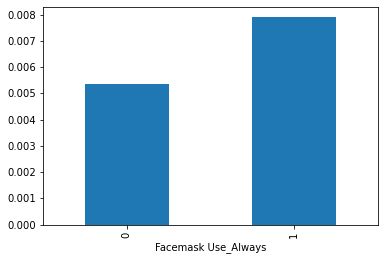

In [48]:
facemasks.groupby('Facemask Use_Always').positive.mean().plot.bar()

<AxesSubplot:xlabel='Facemask Use_Frequently'>

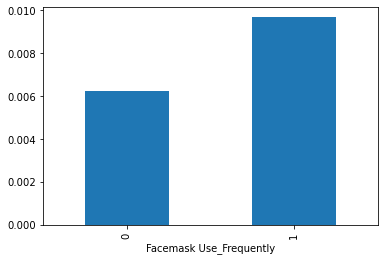

In [49]:
facemasks.groupby('Facemask Use_Frequently').positive.mean().plot.bar()

<AxesSubplot:xlabel='Facemask Use_Not at all'>

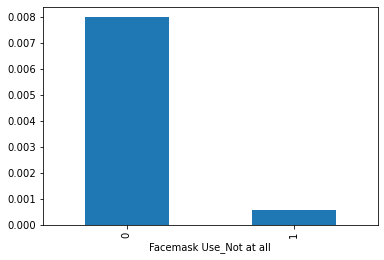

In [50]:
facemasks.groupby('Facemask Use_Not at all').positive.mean().plot.bar()

<AxesSubplot:xlabel='Facemask Use_Rarely'>

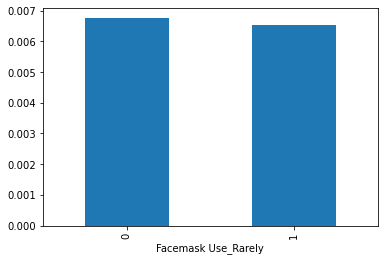

In [51]:
facemasks.groupby('Facemask Use_Rarely').positive.mean().plot.bar()

<AxesSubplot:xlabel='Facemask Use_Sometimes'>

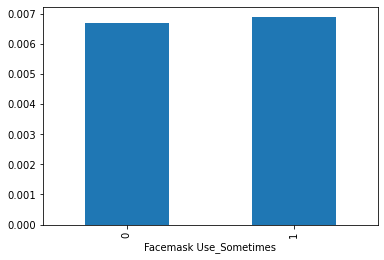

In [52]:
facemasks.groupby('Facemask Use_Sometimes').positive.mean().plot.bar()

In [28]:
health_bucket = df[['d1_health_1', 'd1_health_2', 'd1_health_3','d1_health_4', 
                    'd1_health_5', 'd1_health_6', 'd1_health_7', 'd1_health_8', 
                    'd1_health_9', 'd1_health_10','d1_health_11','d1_health_12','d1_health_13']].copy()



In [29]:
health_bucket = pd.get_dummies(health_bucket, columns=['d1_health_1', 'd1_health_2', 'd1_health_3','d1_health_4', 
                    'd1_health_5', 'd1_health_6', 'd1_health_7', 'd1_health_8', 
                    'd1_health_9', 'd1_health_10','d1_health_11','d1_health_12','d1_health_13'])

In [30]:
Preexisting_Conditions = health_bucket[['d1_health_1_Yes', 'd1_health_2_Yes', 'd1_health_3_Yes','d1_health_4_Yes', 
                    'd1_health_5_Yes', 'd1_health_6_Yes', 'd1_health_7_Yes', 'd1_health_8_Yes', 
                    'd1_health_9_Yes', 'd1_health_10_Yes','d1_health_11_Yes','d1_health_12_Yes','d1_health_13_Yes']].copy()

In [31]:
Preexisting_Conditions["Preexisting Condition Score"] = Preexisting_Conditions.sum(axis=1,numeric_only=bool)


In [32]:
d1_health_1 - Arthritis
d1_health_2 - Asthma
d1_health_3 - Cancer
d1_health_4 - Cystic fibrosis
d1_health_5 - Chronic obstructive pulmonary disease (COPD)
d1_health_6 - Diabetes
d1_health_7 - Epilepsy
d1_health_8 - Heart disease
d1_health_9 - High blood pressure
d1_health_10 - High cholesterol
d1_health_11 - HIV/ Aids
d1_health_12 - Mental health condition
d1_health_13 - Multiple Sclerosis

SyntaxError: invalid syntax (<ipython-input-32-cb2e421c6489>, line 4)

In [33]:
Preexisting_Conditions.rename(columns={'d1_health_1_Yes': 'Arthritis', 'd1_health_2_Yes': 'Asthma', 
                         'd1_health_3_Yes': 'Cancer', 'd1_health_4_Yes': 'Cystic fibrosis', 'd1_health_5_Yes': 'COPD',  
                         'd1_health_6_Yes':'Diabetes','d1_health_7_Yes':'Epilepsy','d1_health_8_Yes':'Heart disease',
                        'd1_health_9_Yes':'High blood pressure','d1_health_10_Yes':'High cholesterol','d1_health_11_Yes':'HIV',
                         'd1_health_12_Yes':'Mental health condition','d1_health_13_Yes':'Multiple Sclerosis'}, inplace=True)

In [34]:
Preexisting_Conditions

,Arthritis,Asthma,Cancer,Cystic fibrosis,COPD,Diabetes,Epilepsy,Heart disease,High blood pressure,High cholesterol,HIV,Mental health condition,Multiple Sclerosis,Preexisting Condition Score
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,1,0,2
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33935,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33936,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33937,0,0,0,0,0,1,0,0,1,1,0,0,0,3
33938,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
event_bucket = df[['i12_health_11','i12_health_12','i12_health_13','i12_health_14']].copy()

In [37]:
event_bucket.rename(columns={'i12_health_11':'guests','i12_health_12':'small_events','i12_health_13':'medium_events','i12_health_14':'large_events'},inplace=True)

In [38]:
event_bucket = pd.get_dummies(event_bucket, columns=['guests','small_events','medium_events','large_events'])

In [39]:
event_bucket2 = event_bucket[['guests_Not at all','small_events_Not at all','medium_events_Not at all','large_events_Not at all']].copy()

In [58]:
event_bucket2

,guests_Not at all,small_events_Not at all,medium_events_Not at all,large_events_Not at all
0,0,1,1,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
33935,0,0,0,0
33936,0,1,0,0
33937,0,0,0,0
33938,0,0,0,0


In [ ]:
event_bucket2

In [55]:
def event_converter(i):
    if i == "Not at all":
        i = 0
    elif i == "Frequently":
        i = 1
    elif i == "Sometimes":
        i = 2
    elif i == "Rarely":
        i = 3
    else: 
        i = 4
    return i

In [56]:
attend_small_gatherings = []
attend_medium_gatherings = []
attend_large_gatherings = []
had_guests = []

In [57]:
for i in event_bucket.i12_health_11:
    had_guests.append(event_converter(i))
for i in event_bucket.i12_health_12:
    attend_small_gatherings.append(event_converter(i))
for i in event_bucket.i12_health_13:
    attend_medium_gatherings.append(event_converter(i))
for i in event_bucket.i12_health_14:
    attend_large_gatherings.append(event_converter(i))

AttributeError: 'DataFrame' object has no attribute 'i12_health_11'

In [ ]:
events = pd.DataFrame(list(zip(had_guests, attend_small_gatherings, attend_medium_gatherings, attend_large_gatherings)),
               columns =['had_guests','attend_small_gatherings', 'attend_medium_gatherings','attend_large_gatherings'])

In [59]:
event_bucket2["Attenting_Events_Score"] = event_bucket2.sum(axis=1,numeric_only=bool)


In [60]:
event_bucket2

,guests_Not at all,small_events_Not at all,medium_events_Not at all,large_events_Not at all,Attenting_Events_Score
0,0,1,1,0,2
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
33935,0,0,0,0,0
33936,0,1,0,0,1
33937,0,0,0,0,0
33938,0,0,0,0,0


In [ ]:
events

In [ ]:
other_bucket["Attenting_Events_Score"] = events["Attenting_Events_Score"]

In [ ]:
other_bucket["Preexisting_Condition_Score"] = Preexisting_Conditions["Preexisting Condition Score"]

In [ ]:
other_bucket = other_bucket.drop(['COVID-19 Status_No, I have not','COVID-19 Status_Yes, and I have not received my results from the test yet','COVID-19 Status_Yes, and I tested negative','COVID-19 Status_Yes, and I tested negative'], axis=1)

In [ ]:
other_bucket

In [40]:
other_bucket3 = other_bucket2.drop(['i12_health_11','COVID-19 Status_ ','Contact w/ COVID_ ','Contact w/ COVID_Not sure','Travel_ '
              ,'Travel_Not sure','Facemask Use_Sometimes','Soap Use_Sometimes','Avoided shops_Sometimes','Avoided public transport?_Sometimes',
             'Avoided working from home?_ ','Avoided working from home?_Sometimes'],axis=1)

In [ ]:

my_list = other_bucket.columns.values.tolist()

print (my_list)

In [42]:
final_features = other_bucket3.drop(['COVID-19 Status_No, I have not', 'COVID-19 Status_Yes, and I have not received my results from the test yet', 'COVID-19 Status_Yes, and I tested negative', 
                                   'Contact w/ COVID_No', 'Travel_No','Facemask Use_Always', 'Facemask Use_Frequently', 'Facemask Use_Rarely',
                                   'Soap Use_Always', 'Soap Use_Frequently', 'Soap Use_Rarely',
                                   'Avoided shops_Always', 'Avoided shops_Frequently', 'Avoided shops_Rarely',
                                   'Avoided public transport?_Always', 'Avoided public transport?_Frequently', 'Avoided public transport?_Rarely',
                                   'Avoided working from home?_Always', 'Avoided working from home?_Frequently', 'Avoided working from home?_Rarely',
                                   ],axis=1)

In [51]:
final_features2 = final_features.join(event_bucket2)


In [44]:
final_features3 = final_features2.join(Preexisting_Conditions)

In [ ]:
other_bucket.corr()['COVID-19 Status_Yes, and I tested positive'].sort_values(ascending=False).tail(25)

In [ ]:
final_features3.to_csv('USA-data-categorical.csv',index=False)

In [45]:
final_features3.describe()

,weight,age,"COVID-19 Status_Yes, and I tested positive",Contact w/ COVID_Yes,Travel_Yes,Facemask Use_Not at all,Soap Use_Not at all,Avoided shops_Not at all,Avoided public transport?_Not at all,Avoided working from home?_Not at all,...,COPD,Diabetes,Epilepsy,Heart disease,High blood pressure,High cholesterol,HIV,Mental health condition,Multiple Sclerosis,Preexisting Condition Score
count,32060.000000,32060.000000,32060.000000,32060.000000,32060.000000,32060.000000,32060.000000,32060.000000,32060.000000,32060.000000,...,32060.000000,32060.000000,32060.000000,32060.000000,32060.000000,32060.000000,32060.000000,32060.000000,32060.000000,32060.000000
mean,0.999168,47.971179,0.006737,0.012851,0.010137,0.168871,0.024922,0.186276,0.158484,0.171803,...,0.039520,0.093855,0.011666,0.044666,0.227667,0.166064,0.008578,0.090736,0.006769,0.986089
std,0.539207,17.714656,0.081806,0.112633,0.100174,0.374644,0.155890,0.389335,0.365200,0.377215,...,0.194831,0.291632,0.107377,0.206573,0.419333,0.372144,0.092219,0.287238,0.081994,1.405627
min,0.069373,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.807598,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.941758,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.083614,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,17.428809,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000


In [52]:
my_list = final_features3.columns.values.tolist()

print (my_list)

['weight', 'age', 'household_size', 'COVID-19 Status_Yes, and I tested positive', 'Contact w/ COVID_Yes', 'Travel_Yes', 'Facemask Use_Not at all', 'Soap Use_Not at all', 'Avoided shops_Not at all', 'Avoided public transport?_Not at all', 'Avoided working from home?_Not at all', 'gender_Female', 'gender_Male', 'employment_status_Full time employment', 'employment_status_Full time student', 'employment_status_Not working', 'employment_status_Other', 'employment_status_Part time employment', 'employment_status_Retired', 'employment_status_Unemployed', 'household_size2', 'guests_Not at all', 'small_events_Not at all', 'medium_events_Not at all', 'large_events_Not at all', 'Arthritis', 'Asthma', 'Cancer', 'Cystic fibrosis', 'COPD', 'Diabetes', 'Epilepsy', 'Heart disease', 'High blood pressure', 'High cholesterol', 'HIV', 'Mental health condition', 'Multiple Sclerosis', 'Preexisting Condition Score']


In [ ]:
health_features = final_features3[['weight', 'age', 'COVID-19 Status_Yes, and I tested positive', 'Contact w/ COVID_Yes',
                     'gender_Female', 'gender_Male','Arthritis', 'Asthma', 'Cancer', 'Cystic fibrosis', 'COPD', 'Diabetes', 'Epilepsy', 'Heart disease', 'High blood pressure', 
                      'High cholesterol', 'HIV', 'Mental health condition', 'Multiple Sclerosis']].copy()

In [ ]:
final_features4 = final_features3[['COVID-19 Status_Yes, and I tested positive', 'Contact w/ COVID_Yes', 'weight', 'age', 'Travel_Yes', 'Facemask Use_Not at all', 'Soap Use_Not at all', 'Avoided shops_Not at all', 'Avoided public transport?_Not at all', 'Avoided working from home?_Not at all',
                                         'employment_status_Full time employment', 'employment_status_Full time student', 'employment_status_Not working', 'employment_status_Other', 'employment_status_Part time employment', 'employment_status_Retired', 'employment_status_Unemployed', 'household_size_1', 'household_size_2', 'household_size_3', 'household_size_4', 'household_size_5', 'household_size_6', 'household_size_7', 'household_size_8 or more', 
                                          'guests_Not at all', 'small_events_Not at all', 'medium_events_Not at all', 'large_events_Not at all']].copy()

In [ ]:
health_features.to_csv('health-USA.csv', index=False)
enviornmental_features.to_csv('envior-USA.csv', index=False)

In [53]:
compact_features = final_features3[['weight', 'age', 'COVID-19 Status_Yes, and I tested positive', 
                                    'Contact w/ COVID_Yes', 'Travel_Yes', 'Facemask Use_Not at all', 
                                    'Soap Use_Not at all', 'Avoided shops_Not at all', 'Avoided public transport?_Not at all', 
                                    'Avoided working from home?_Not at all', 'gender_Female', 'gender_Male', 
                                    'employment_status_Full time employment', 'employment_status_Full time student', 
                                    'employment_status_Not working', 'employment_status_Other', 
                                    'employment_status_Part time employment', 'employment_status_Retired',
                                    'guests_Not at all', 'small_events_Not at all', 'medium_events_Not at all', 'large_events_Not at all',
                                    'employment_status_Unemployed', 'household_size2','Preexisting Condition Score']].copy()

In [61]:
compact_features['events_score'] = event_bucket2['Attenting_Events_Score']

In [62]:
compact_features.to_csv('compact-USA.csv', index=False)

In [50]:
final_features3

,weight,age,household_size,"COVID-19 Status_Yes, and I tested positive",Contact w/ COVID_Yes,Travel_Yes,Facemask Use_Not at all,Soap Use_Not at all,Avoided shops_Not at all,Avoided public transport?_Not at all,...,COPD,Diabetes,Epilepsy,Heart disease,High blood pressure,High cholesterol,HIV,Mental health condition,Multiple Sclerosis,Preexisting Condition Score
0,0.907068,33,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.878366,38,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.150452,48,2,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,2
3,0.995127,31,5,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.354855,69,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33935,4.645645,59,3,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
33936,1.287069,37,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33937,0.753059,71,2,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,3
33938,1.139877,35,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
